# Training model with Kepler Data

## Describe Data

In [ ]:
import pandas as pd
df = pd.read_csv('Kepler.csv')
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10287723,K01174.01,NaN,CANDIDATE,CANDIDATE,NaN,0,0,0,0,...,-119.0,4.572,0.042,-0.028,0.726,0.039,-0.052,296.82162,47.354031,13.447
1,8505215,K00099.01,NaN,CANDIDATE,CANDIDATE,NaN,0,0,0,0,...,-89.0,4.555,0.048,-0.024,0.736,0.037,-0.044,295.43433,44.531120,12.960
2,11342550,K01421.01,NaN,CANDIDATE,CANDIDATE,NaN,0,0,0,0,...,-193.0,4.445,0.056,-0.299,1.021,0.453,-0.102,287.65045,49.156052,15.305
3,2162635,K01032.01,NaN,CANDIDATE,CANDIDATE,NaN,0,0,0,0,...,-92.0,3.755,0.091,-0.163,2.283,0.625,-0.301,291.97754,37.532551,13.862
4,3230491,K01096.01,NaN,CANDIDATE,CANDIDATE,NaN,0,0,0,0,...,-150.0,4.597,0.030,-0.213,0.760,0.270,-0.055,290.18304,38.321941,14.709


In [ ]:
# Description of Data
print(f"Column Amount {len(df.columns)}")
print(f"Rows Amount {len(df)}")
display(df.columns)

Column Amount 49
Rows Amount 9564


Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

## Detecting and Dropping Null Values

In [ ]:
# Null Values of Each Column
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]
null_columns

kepler_name          6817
koi_score            1510
koi_period_err1       454
koi_period_err2       454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_err1        468
koi_slogg_err2        468
koi_srad              363
koi_srad_err1         468
koi_srad_err2         468
koi_kepmag              1
dtype: int64

In [ ]:
# Dropping inecessary colums (Columns with a large number of null values or index columns )
columns_to_drop = [
    'kepid',
    'kepoi_name',
    'kepler_name',
    'koi_pdisposition',
    'koi_score',
    'koi_teq_err1',
    'koi_teq_err2',
    'koi_tce_plnt_num'
]
df = df.drop(columns=columns_to_drop)
df.head()
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [ ]:
# Notice that koi_tce_delivname is a Categorical Variable and the other Numericals
print(df.dtypes)

koi_disposition       object
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_delivname     object
koi_steff            float64
koi_steff_err1       float64
koi_steff_err2       float64
koi_slogg            float64
koi_slogg_err1       float64
koi_slogg_err2

In [ ]:
# Analyze the Null Data of numerical columns and replace it with the mean
display(df.isnull().sum())
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

koi_disposition        0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_period_err1      454
koi_period_err2      454
koi_impact           363
koi_impact_err1      454
koi_impact_err2      454
koi_time0bk            0
koi_time0bk_err1     454
koi_time0bk_err2     454
koi_duration           0
koi_duration_err1    454
koi_duration_err2    454
koi_depth            363
koi_depth_err1       454
koi_depth_err2       454
koi_prad             363
koi_prad_err1        363
koi_prad_err2        363
koi_teq              363
koi_insol            321
koi_insol_err1       321
koi_insol_err2       321
koi_model_snr        363
koi_tce_delivname    346
koi_steff            363
koi_steff_err1       468
koi_steff_err2       483
koi_slogg            363
koi_slogg_err1       468
koi_slogg_err2       468
koi_srad             363
koi_srad_err1        468
koi_srad_err2        468
ra                     0
dec                    0


In [ ]:
# koi_tce_delivname is a categorical variable so
display(df.isnull().sum())
len(df.columns)

koi_disposition        0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_period_err1        0
koi_period_err2        0
koi_impact             0
koi_impact_err1        0
koi_impact_err2        0
koi_time0bk            0
koi_time0bk_err1       0
koi_time0bk_err2       0
koi_duration           0
koi_duration_err1      0
koi_duration_err2      0
koi_depth              0
koi_depth_err1         0
koi_depth_err2         0
koi_prad               0
koi_prad_err1          0
koi_prad_err2          0
koi_teq                0
koi_insol              0
koi_insol_err1         0
koi_insol_err2         0
koi_model_snr          0
koi_tce_delivname    346
koi_steff              0
koi_steff_err1         0
koi_steff_err2         0
koi_slogg              0
koi_slogg_err1         0
koi_slogg_err2         0
koi_srad               0
koi_srad_err1          0
koi_srad_err2          0
ra                     0
dec                    0


41

In [ ]:
# Show unique variables of koi_tce_delivname
display(df['koi_tce_delivname'].unique())

array([nan, 'q1_q17_dr25_tce', 'q1_q16_tce', 'q1_q17_dr24_tce'],
      dtype=object)

In [ ]:
# We Create Dummy Variable a one hot technique
df = pd.get_dummies(df, columns=['koi_tce_delivname'], dummy_na=True)
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,...,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_tce_delivname_q1_q16_tce,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce,koi_tce_delivname_nan
0,CANDIDATE,0,0,0,0,129995.778400,0.000000e+00,0.000000e+00,0.7127,0.1831,...,0.726,0.039,-0.052,296.82162,47.354031,13.447,False,False,False,True
1,CANDIDATE,0,0,0,0,2190.701035,0.000000e+00,0.000000e+00,0.2597,0.2254,...,0.736,0.037,-0.044,295.43433,44.531120,12.960,False,False,False,True
2,CANDIDATE,0,0,0,0,1693.663622,0.000000e+00,0.000000e+00,0.5283,0.0596,...,1.021,0.453,-0.102,287.65045,49.156052,15.305,False,False,False,True
3,CANDIDATE,0,0,0,0,1500.140677,0.000000e+00,0.000000e+00,0.9131,0.0068,...,2.283,0.625,-0.301,291.97754,37.532551,13.862,False,False,False,True
4,CANDIDATE,0,0,0,0,1500.000000,0.000000e+00,0.000000e+00,0.9243,0.3976,...,0.760,0.270,-0.055,290.18304,38.321941,14.709,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,CANDIDATE,0,0,0,0,0.306702,7.190000e-07,-7.190000e-07,0.1730,0.2830,...,0.786,0.110,-0.099,289.82599,43.725231,15.229,False,False,True,False
9560,FALSE POSITIVE,0,1,0,0,0.299698,1.910000e-07,-1.910000e-07,0.9640,0.0370,...,0.782,0.090,-0.074,296.96381,50.745380,14.828,False,False,True,False
9561,FALSE POSITIVE,0,0,0,0,0.293630,1.150000e-07,-1.150000e-07,1.2329,0.2354,...,0.843,0.244,-0.068,296.33435,47.145580,15.822,False,False,False,True
9562,CANDIDATE,0,0,0,0,0.259820,4.040000e-07,-4.040000e-07,0.9720,0.0410,...,0.526,0.035,-0.035,281.11646,43.282440,15.174,False,False,True,False


## Preparing dependent variable

In [ ]:
df['koi_disposition'].unique()

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [ ]:
# We are going to clean our dependent variable koi_disposition
df = df[df['koi_disposition'].isin(['CANDIDATE', 'CONFIRMED'])]
display(df['koi_disposition'].value_counts())

df['koi_disposition'] = df['koi_disposition'].map({'CANDIDATE': 0, 'CONFIRMED': 1})
display(df['koi_disposition'].value_counts())

koi_disposition
CONFIRMED    2746
CANDIDATE    1979
Name: count, dtype: int64

/tmp/ipykernel_313005/4204802615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['koi_disposition'] = df['koi_disposition'].map({'CANDIDATE': 0, 'CONFIRMED': 1})


koi_disposition
1    2746
0    1979
Name: count, dtype: int64

In [ ]:
len(df)

4725

## Selecting Features and Plot

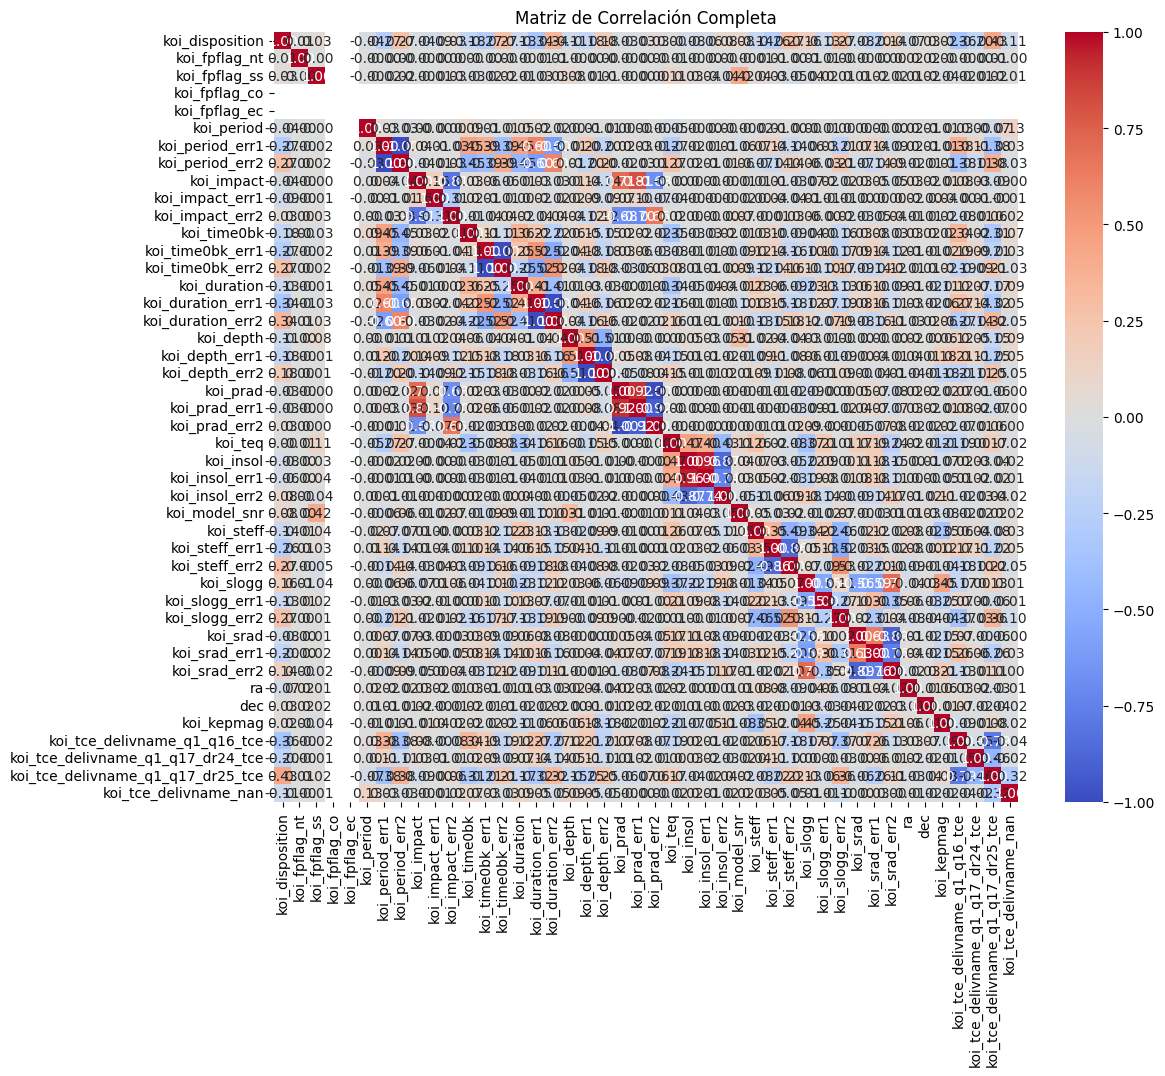

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlación completa
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación Completa")
plt.show()

/tmp/ipykernel_313005/866374618.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm")


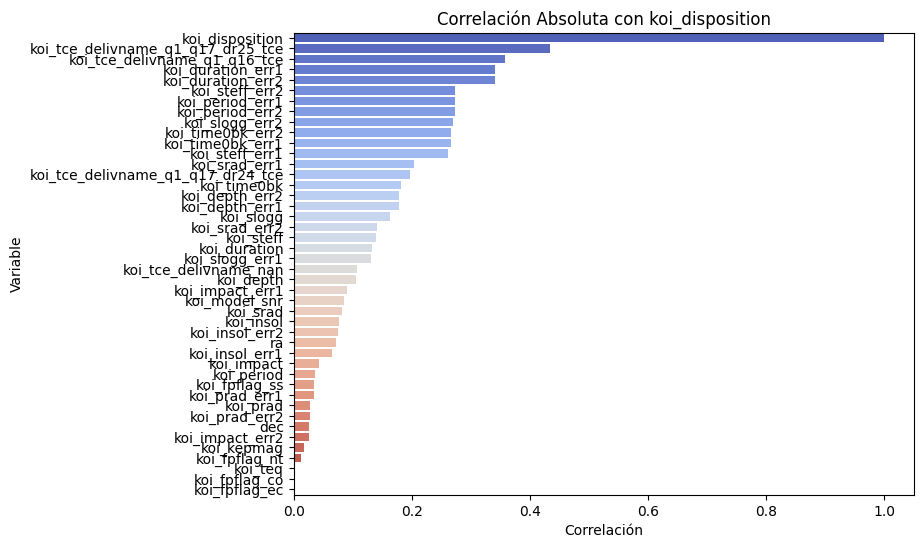

In [ ]:
# See correlation of the variables with my dependent variable
import matplotlib.pyplot as plt
import seaborn as sns
correlations = df.corr()['koi_disposition'].abs().sort_values(ascending=False)
correlations
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm")
plt.title("Correlación Absoluta con koi_disposition")
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.show()

In [ ]:
possible_features = correlations[correlations > 0.1].index.drop('koi_disposition').tolist()
possible_features


['koi_tce_delivname_q1_q17_dr25_tce',
 'koi_tce_delivname_q1_q16_tce',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_steff_err2',
 'koi_period_err1',
 'koi_period_err2',
 'koi_slogg_err2',
 'koi_time0bk_err2',
 'koi_time0bk_err1',
 'koi_steff_err1',
 'koi_srad_err1',
 'koi_tce_delivname_q1_q17_dr24_tce',
 'koi_time0bk',
 'koi_depth_err2',
 'koi_depth_err1',
 'koi_slogg',
 'koi_srad_err2',
 'koi_steff',
 'koi_duration',
 'koi_slogg_err1',
 'koi_tce_delivname_nan',
 'koi_depth']

In [ ]:
# We are going to ignore all the columns err
features = [
    'koi_tce_delivname_q1_q17_dr25_tce',
    'koi_tce_delivname_q1_q16_tce',
    'koi_tce_delivname_q1_q17_dr24_tce',
    'koi_time0bk',
    'koi_slogg',
    'koi_steff',
    'koi_duration',
    'koi_tce_delivname_nan',
    'koi_depth'
]

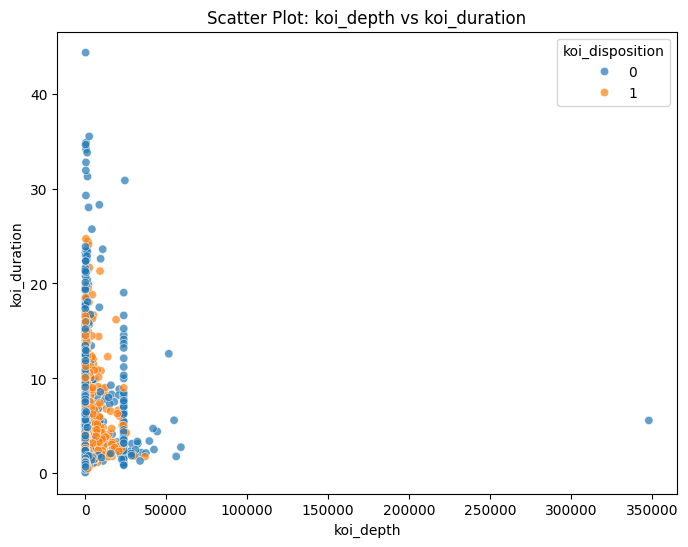

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='koi_depth',
    y='koi_duration',
    hue='koi_disposition',
    alpha=0.7
)
plt.title("Scatter Plot: koi_depth vs koi_duration")
plt.xlabel("koi_depth")
plt.ylabel("koi_duration")
plt.legend(title='koi_disposition')
plt.show()

In [ ]:
# Divide the data, X Independent Variables Y dependent Variables
X = df[features]
y = df['koi_disposition']

## Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Divide train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling data, mean = 0, dv = 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Rows:",len(X_train_scaled))
print("CANDIDATE (0):", (y_train == 0).sum())
print("CONFIRMED (1):", (y_train == 1).sum())

Rows: 3307
CANDIDATE (0): 1363
CONFIRMED (1): 1944


## Training Models

* We tested different strategies, from individual models to ensemble models. From removing null values to using techniques such as SMOTE. We even tested different combinations of models, combinations for stacking. Below are the tests performed.

### 1. Test
This test was based on combinations of individual models and individual models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Random Subspace": RandomForestClassifier(max_features=0.5, random_state=42),
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=42)),
            ('et', ExtraTreesClassifier(random_state=42)),
            ('ada', AdaBoostClassifier(random_state=42))
        ],
        final_estimator=LogisticRegression(max_iter=1000, random_state=42),
        passthrough=True
    )
}

# cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

def get_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'sensitivity': recall_score(y_true, y_pred),  # Sensitivity = Recall
        'precision': precision_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }

# Evaluating Models with base hiperparameters
results_default = {}
for name, model in models.items():
    print(f"\nModelo: {name} (Default)")
    scores = {'accuracy': [], 'sensitivity': [], 'precision': [], 'f1': []}
    for train_idx, test_idx in cv.split(X_train_scaled, y_train):
        model.fit(X_train_scaled[train_idx], y_train.iloc[train_idx])
        y_pred = model.predict(X_train_scaled[test_idx])
        m = get_metrics(y_train.iloc[test_idx], y_pred)
        for k in scores: scores[k].append(m[k])
    for k in scores:
        print(f"{k}: {np.mean(scores[k]):.3f} ± {np.std(scores[k]):.3f}")
    # Matriz de confusión final fold
    y_pred_final = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred_final)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name} (Default)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    results_default[name] = scores

In [ ]:
# Now evaluate the same model but with tune hiperparameters
# Grid search to find better hiperparameters
param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.5, 1.0, 1.5]
    },
    "Extra Trees": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "Random Subspace": {
        'n_estimators': [100, 200],
        'max_features': [0.3, 0.5, 0.7]
    },
    "Stacking": {}  # GridSearchCV doesnt support stacking esemble
}

# Validate with new hiperparameters
results_tuned = {}
best_params = {}
for name, model in models.items():
    if param_grids[name]:
        print(f"\n{name} - Grid Search")
        grid = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train_scaled, y_train)
        print("Best Hyperparameters:", grid.best_params_)
        best_params[name] = grid.best_params_
        best_model = grid.best_estimator_
    else:
        best_model = model

    # Evaluate new model
    scores = {'accuracy': [], 'sensitivity': [], 'precision': [], 'f1': []}
    for train_idx, test_idx in cv.split(X_train_scaled, y_train):
        best_model.fit(X_train_scaled[train_idx], y_train.iloc[train_idx])
        y_pred = best_model.predict(X_train_scaled[test_idx])
        m = get_metrics(y_train.iloc[test_idx], y_pred)
        for k in scores: scores[k].append(m[k])
    for k in scores:
        print(f"{k}: {np.mean(scores[k]):.3f} ± {np.std(scores[k]):.3f}")
    # Matriz confusion final fold
    y_pred_final = best_model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred_final)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.title(f"Confusion Matrix - {name} (Tuned)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    results_tuned[name] = scores

### 2. Test
This test was based on more complex combinations to find greater relationships between the data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Definir combinaciones
combinations = {
    "LGBM + GradientBoosting": [
        ('lgbm', LGBMClassifier(random_state=42,verbose = -1)),
        ('gb', GradientBoostingClassifier(random_state=42))
    ],
    "NeuralNet + KNN + DecisionTree": [
        ('mlp', MLPClassifier(max_iter=1000, random_state=42,verbose = False)),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier(random_state=42))
    ],
    "RF + GB + LGBM + XGB + AdaBoost": [
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('lgbm', LGBMClassifier(random_state=42,verbose = -1)),
        ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',verbosity = 0)),
        ('ada', AdaBoostClassifier(random_state=42))
    ],
    "RF + NaiveBayes": [
        ('rf', RandomForestClassifier(random_state=42)),
        ('nb', GaussianNB())
    ],
    "RF + AdaBoost": [
        ('rf', RandomForestClassifier(random_state=42)),
        ('ada', AdaBoostClassifier(random_state=42))
    ]
}

# Validación cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

def get_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'sensitivity': recall_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }

# Hiperparámetros para GridSearch (ajusta según recursos)
param_grids = {
    'rf': {'n_estimators': [100, 200], 'max_depth': [None, 10]},
    'gb': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    'lgbm': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    'xgb': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    'ada': {'n_estimators': [50, 100], 'learning_rate': [0.5, 1.0]},
    'mlp': {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001]},
    'knn': {'n_neighbors': [3, 5]},
    'dt': {'max_depth': [None, 10, 20]},
    'nb': {}  # No hiperparámetros importantes
}

for name, estimators in combinations.items():
    print(f"\n=== {name} ===")
    # 1. Default: Stacking con estimadores por defecto
    stack = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(max_iter=1000, random_state=42),
        passthrough=True
    )
    scores = {'accuracy': [], 'sensitivity': [], 'precision': [], 'f1': []}
    for train_idx, test_idx in cv.split(X_train_scaled, y_train):
        stack.fit(X_train_scaled[train_idx], y_train.iloc[train_idx])
        y_pred = stack.predict(X_train_scaled[test_idx])
        m = get_metrics(y_train.iloc[test_idx], y_pred)
        for k in scores: scores[k].append(m[k])
    print("Default hyperparameters:")
    for k in scores:
        print(f"{k}: {np.mean(scores[k]):.3f} ± {np.std(scores[k]):.3f}")
    # Matriz de confusión en test
    stack.fit(X_train_scaled, y_train)
    y_pred_test = stack.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name} (Default)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # 2. GridSearch: Tuneo de hiperparámetros de cada estimador
    tuned_estimators = []
    for est_name, est in estimators:
        if param_grids[est_name]:
            grid = GridSearchCV(est, param_grids[est_name], cv=3, scoring='accuracy', n_jobs=-1)
            grid.fit(X_train_scaled, y_train)
            print(f"Best params for {est_name}: {grid.best_params_}")
            tuned_estimators.append((est_name, grid.best_estimator_))
        else:
            tuned_estimators.append((est_name, est))
    stack_tuned = StackingClassifier(
        estimators=tuned_estimators,
        final_estimator=LogisticRegression(max_iter=1000, random_state=42),
        passthrough=True
    )
    scores_tuned = {'accuracy': [], 'sensitivity': [], 'precision': [], 'f1': []}
    for train_idx, test_idx in cv.split(X_train_scaled, y_train):
        stack_tuned.fit(X_train_scaled[train_idx], y_train.iloc[train_idx])
        y_pred = stack_tuned.predict(X_train_scaled[test_idx])
        m = get_metrics(y_train.iloc[test_idx], y_pred)
        for k in scores_tuned: scores_tuned[k].append(m[k])
    print("Tuned hyperparameters:")
    for k in scores_tuned:
        print(f"{k}: {np.mean(scores_tuned[k]):.3f} ± {np.std(scores_tuned[k]):.3f}")
    # Matriz de confusión en test
    stack_tuned.fit(X_train_scaled, y_train)
    y_pred_test = stack_tuned.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.title(f"Confusion Matrix - {name} (Tuned)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### 3. Test
In this case, we changed the approach slightly. Instead of replacing with the mean, we used the median to avoid outliers. We also changed the ML algorithm, opting for an ensemble voting algorithm, combining several classifiers such as Random Forest, LightGBM, and XGBoost. At the same time, we used soft voting, meaning that instead of voting only for the most probable class (“hard”), each model contributes the estimated probability of each class, and the ensemble averages those probabilities.
It then chooses the class with the highest average probability. On the other hand, we calculated caps derived from other fields, thus obtaining greater accuracy.

In [ ]:
# Imports and Load Data (again)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Kepler.csv')
print("Dimensions", df.shape)
print("Columns", df.columns.tolist())


Dimensions (9564, 49)
Columns ['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']


In [ ]:
# Drop some ineccesary columns
columns_to_drop = ['kepid', 'kepoi_name', 'kepler_name', 'koi_pdisposition',
                   'koi_score', 'koi_teq_err1', 'koi_teq_err2', 'koi_tce_plnt_num']
df.drop(columns=columns_to_drop, inplace=True)

df.shape


(9564, 41)

In [ ]:
# Filter only CANDIDATE AND CONFIRMED VALUES
df = df[df['koi_disposition'].isin(['CONFIRMED', 'CANDIDATE'])]
print("\nClass Distribution:")
print(df['koi_disposition'].value_counts())
# Convert to numerical values
df['label'] = df['koi_disposition'].map({'CANDIDATE':0,'CONFIRMED': 1,})
print(df.head())

df.drop(columns=['koi_disposition'], inplace=True)


Class Distribution:
koi_disposition
CONFIRMED    2746
CANDIDATE    1979
Name: count, dtype: int64
  koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       CANDIDATE              0              0              0              0   
1       CANDIDATE              0              0              0              0   
2       CANDIDATE              0              0              0              0   
3       CANDIDATE              0              0              0              0   
4       CANDIDATE              0              0              0              0   

      koi_period  koi_period_err1  koi_period_err2  koi_impact  \
0  129995.778400              0.0              0.0      0.7127   
1    2190.701035              0.0              0.0      0.2597   
2    1693.663622              0.0              0.0      0.5283   
3    1500.140677              0.0              0.0      0.9131   
4    1500.000000              0.0              0.0      0.9243   

   koi_impact_err

In [ ]:
# Categorial variable to numerical Variable
if 'koi_tce_delivname' in df.columns:
    df = pd.get_dummies(df, columns=['koi_tce_delivname'], drop_first=True)

df.fillna(df.median(numeric_only=True), inplace=True) # We use the median to avoid the outliers values


In [ ]:
# New Features
if set(['koi_depth', 'koi_duration']).issubset(df.columns):
    df['depth_duration_ratio'] = df['koi_depth'] / (df['koi_duration'] + 1e-6)
if set(['koi_insol', 'koi_prad']).issubset(df.columns):
    df['insol_prad_ratio'] = df['koi_insol'] / (df['koi_prad'] + 1e-6)
if set(['koi_steff', 'koi_srad']).issubset(df.columns):
    df['stellar_luminosity_proxy'] = df['koi_steff'] * (df['koi_srad'] ** 2)

print("\nFinal Features:")
print(df.columns.tolist())
print("\nFinal Dimensions:", df.shape)


Final Features:
['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag', 'label', 'koi_tce_delivname_q1_q17_dr24_tce', 'koi_tce_delivname_q1_q17_dr25_tce', 'depth_duration_ratio', 'insol_prad_ratio', 'stellar_luminosity_proxy']

Final Dimensions: (4725, 45)


In [ ]:
# Dividing Data
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nDistribtion training sets:")
print("CONFIRMED:", (y_train == 1).sum())
print("CANDIDATE:", (y_train == 0).sum())





Distribtion training sets:
CONFIRMED: 1922
CANDIDATE: 1385


In [ ]:
# Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE for balancing classes, crreate new examples interpolating
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("\nDistribution after SMOTE:")
print("CANDIDATE:", (y_train_res == 0).sum())
print("CONFIRMED:", (y_train_res == 1).sum())


Distribution after SMOTE:
CANDIDATE: 1922
CONFIRMED: 1922


<Figure size 1200x800 with 0 Axes>

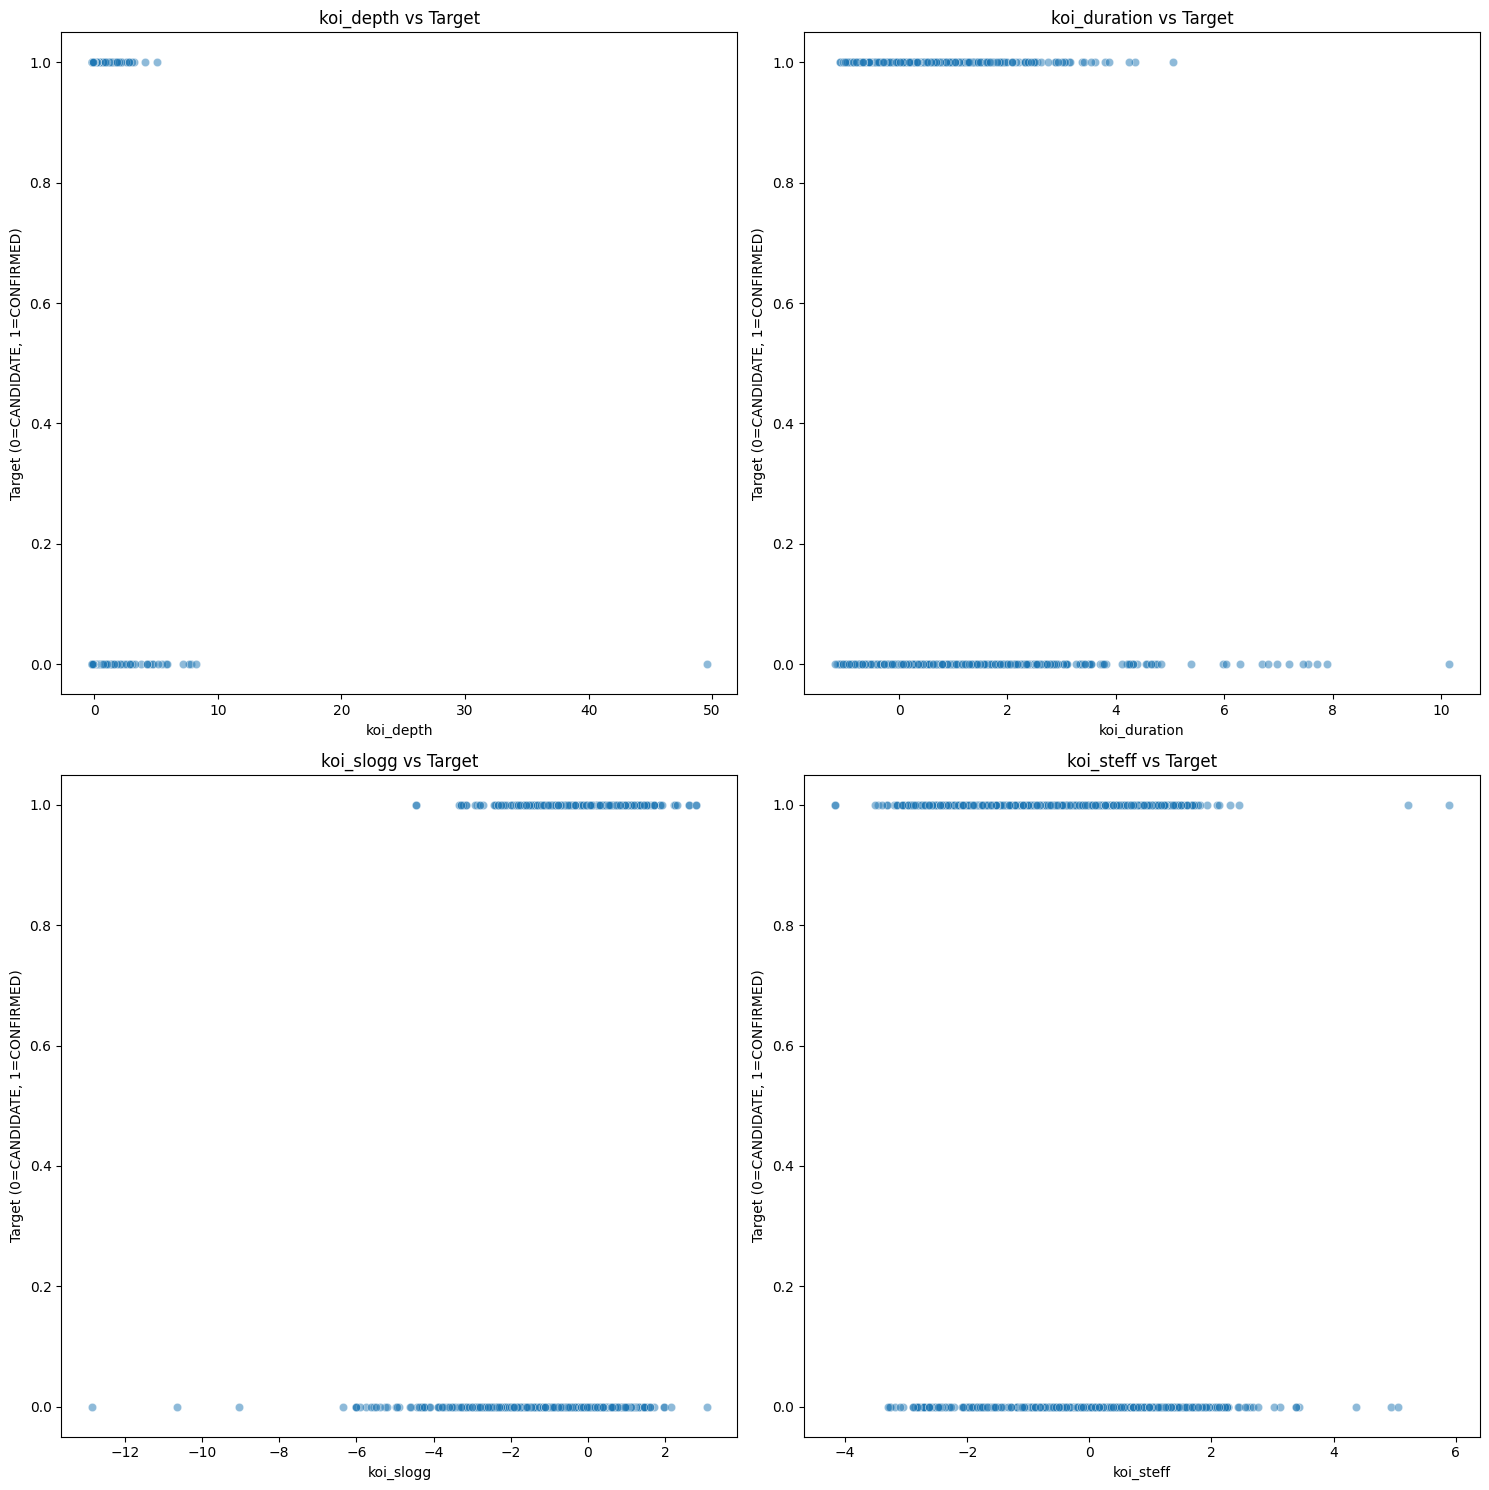

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipython-input-2199422409.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


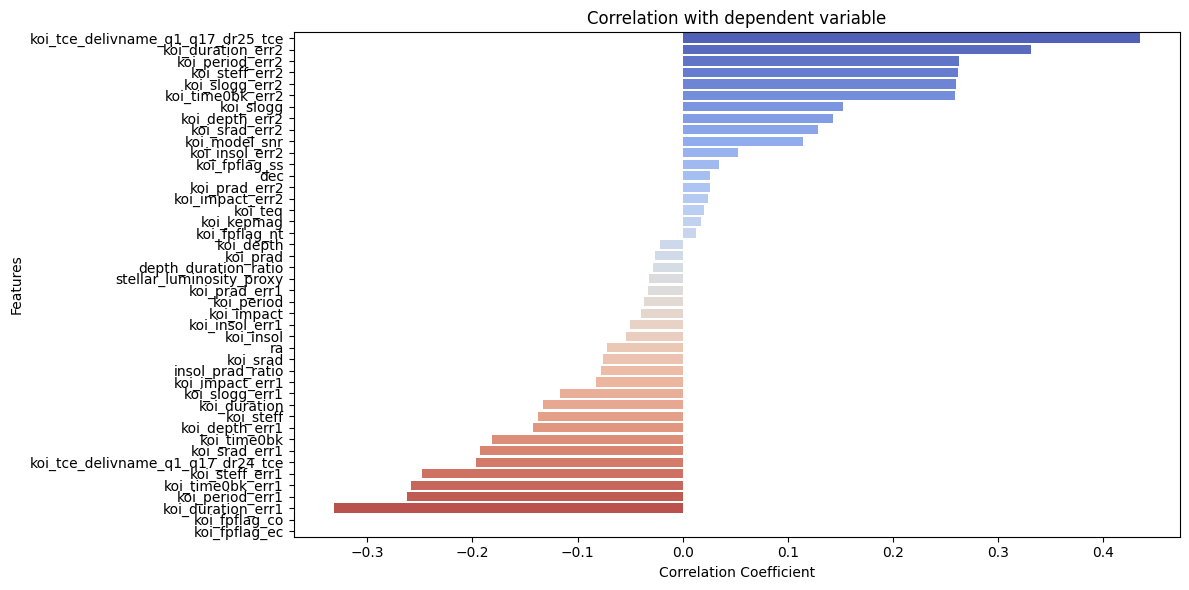

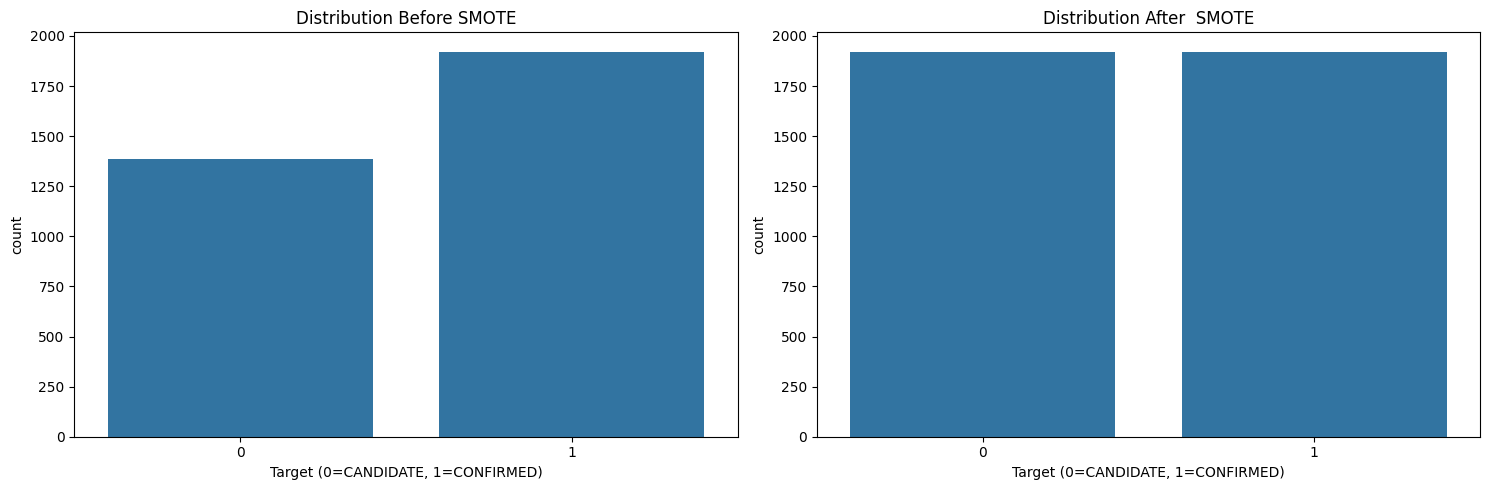

In [ ]:
# Some Plots
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of improtant features
plt.figure(figsize=(12, 8))
features_to_plot = ['koi_depth', 'koi_duration', 'koi_slogg', 'koi_steff']
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel() # Matrix 2x2 to a Array 1D

for idx, feature in enumerate(features_to_plot):
    sns.scatterplot(
        data=pd.DataFrame(
            {
                'feature': X_train_scaled[:, X.columns.get_loc(feature)],
                'target': y_train
            }
        ),
        x='feature',
        y='target',
        ax=axes[idx],
        alpha=0.5
    )
    axes[idx].set_title(f'{feature} vs Target')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Target (0=CANDIDATE, 1=CONFIRMED)')

plt.tight_layout()
plt.show()

# 2. Correlación con la variable objetivo
correlations = pd.DataFrame({
    'feature': X.columns,
    'correlation': [
        np.corrcoef(X[col], y)[0,1] for col in X.columns
    ]
})
correlations = correlations.sort_values('correlation', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=correlations,
    x='correlation',
    y='feature',
    palette='coolwarm'
)
plt.title('Correlation with dependent variable')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# 3. Distribution Before and After SMOTE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# BEFORE SMOTE
sns.countplot(data=pd.DataFrame({'target': y_train}), x='target', ax=ax1)
ax1.set_title('Distribution Before SMOTE')
ax1.set_xlabel('Target (0=CANDIDATE, 1=CONFIRMED)')

# AFTER SMOTE
sns.countplot(data=pd.DataFrame({'target': y_train_res}), x='target', ax=ax2)
ax2.set_title('Distribution After  SMOTE')
ax2.set_xlabel('Target (0=CANDIDATE, 1=CONFIRMED)')

plt.tight_layout()
plt.show()


In [ ]:
# Defining model
rf = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42)
lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.05, random_state=42, verbose=-1)
xgb = XGBClassifier(n_estimators=300, learning_rate=0.05, random_state=42,
                    use_label_encoder=False, eval_metric='logloss', verbosity=0)

# Ensemble algoritm
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('lgbm', lgbm), ('xgb', xgb)],
    voting='soft'
)

# Training
ensemble.fit(X_train_res, y_train_res)

# Prediction
y_pred = ensemble.predict(X_test_scaled)
y_prob = ensemble.predict_proba(X_test_scaled)[:, 1]

# Metrics
metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred),
    'roc_auc': roc_auc_score(y_test, y_prob)
}

print("\n=== Model Performance ===")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== Model Performance ===
accuracy: 0.8745
recall: 0.8956
precision: 0.8892
f1: 0.8924
roc_auc: 0.9405


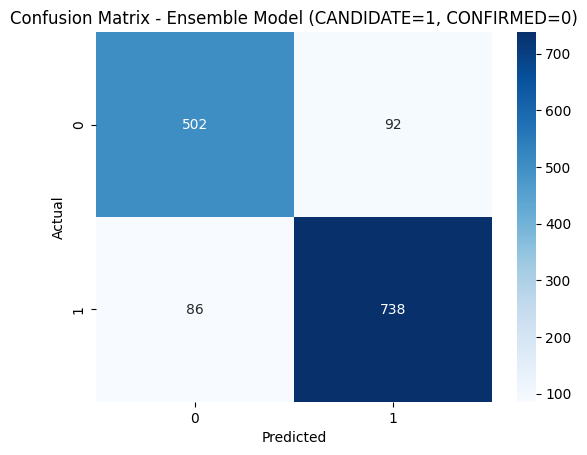

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Ensemble Model (CANDIDATE=1, CONFIRMED=0)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

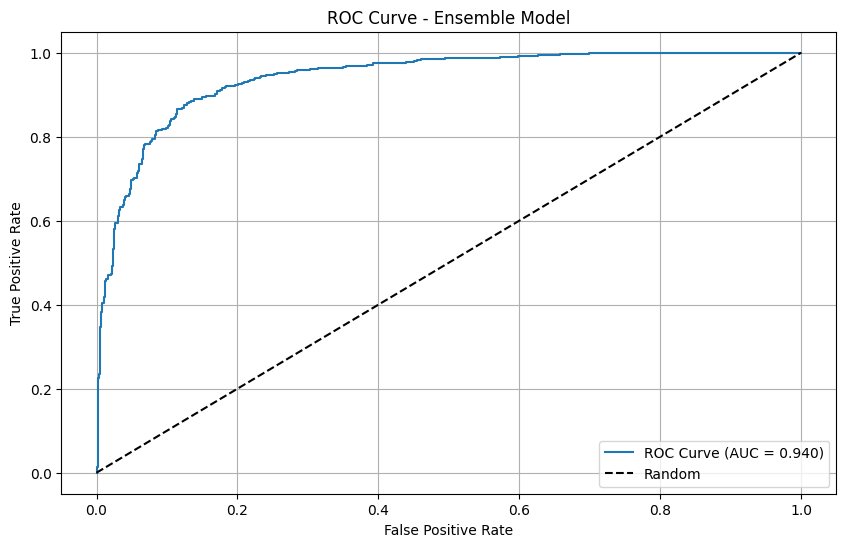

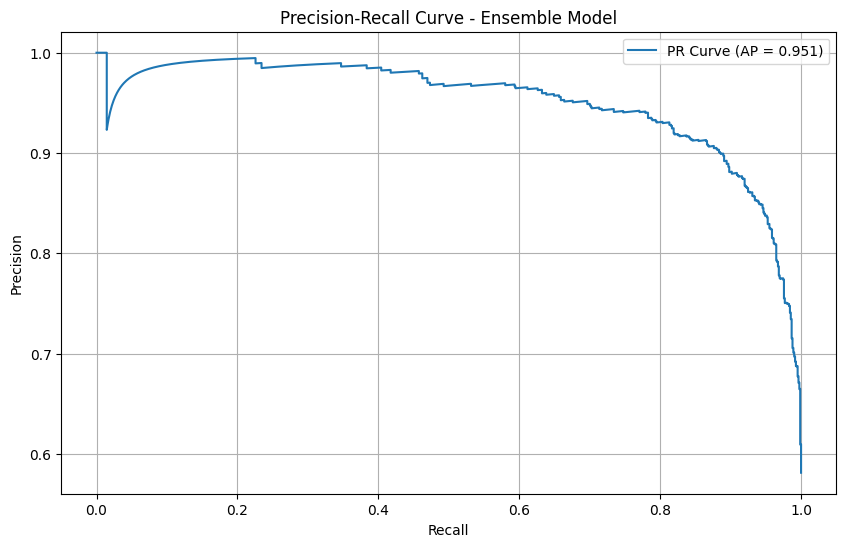

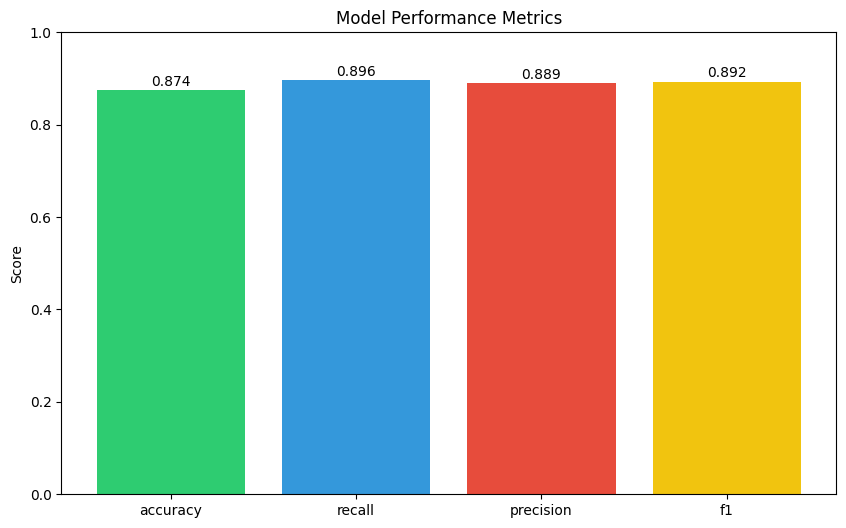

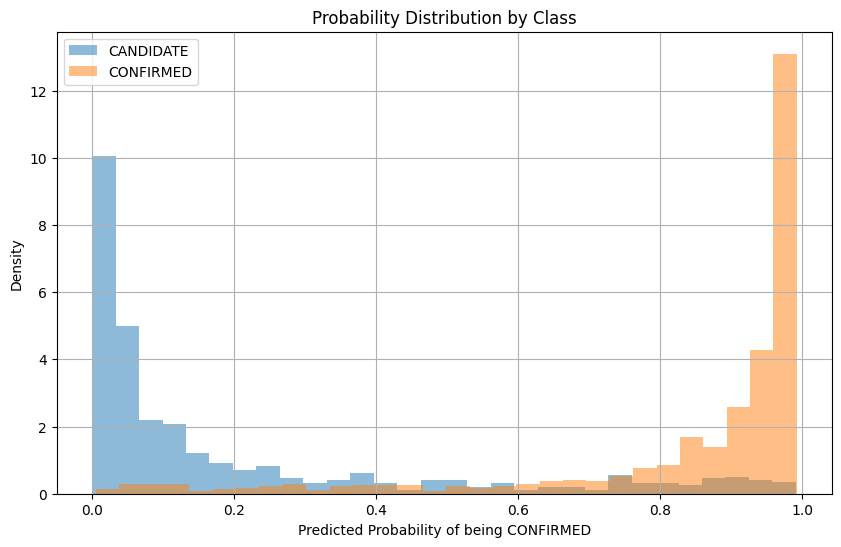

In [ ]:
# 1. ROC Curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(10, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics["roc_auc"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ensemble Model')
plt.legend()
plt.grid(True)
plt.show()

# 2. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score
plt.figure(figsize=(10, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap_score = average_precision_score(y_test, y_prob)
plt.plot(recall, precision, label=f'PR Curve (AP = {ap_score:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Ensemble Model')
plt.legend()
plt.grid(True)
plt.show()

# 3. Metrics Comparison Bar Plot
plt.figure(figsize=(10, 6))
metrics_display = {k: v for k, v in metrics.items() if k != 'roc_auc'}
plt.bar(metrics_display.keys(), metrics_display.values(), color=['#2ecc71', '#3498db', '#e74c3c', '#f1c40f'])
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
for i, v in enumerate(metrics_display.values()):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.show()

# 4. Probability Distribution
plt.figure(figsize=(10, 6))
for label in [0, 1]:
    mask = y_test == label
    plt.hist(y_prob[mask], bins=30, alpha=0.5,
             label=f'{"CONFIRMED" if label else "CANDIDATE"}',
             density=True)
plt.xlabel('Predicted Probability of being CONFIRMED')
plt.ylabel('Density')
plt.title('Probability Distribution by Class')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Download model :
import joblib
joblib.dump(ensemble, 'ensemble_model_exoplanets.pkl')

['ensemble_model_exoplanets.pkl']